In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the Data

In [3]:
df = pd.read_csv("FuelConsumption.csv")

Lets take a look at the dataset

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [6]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
# copy some data to explore more [numeric and impactfull data in this case]
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


## Data Visualization

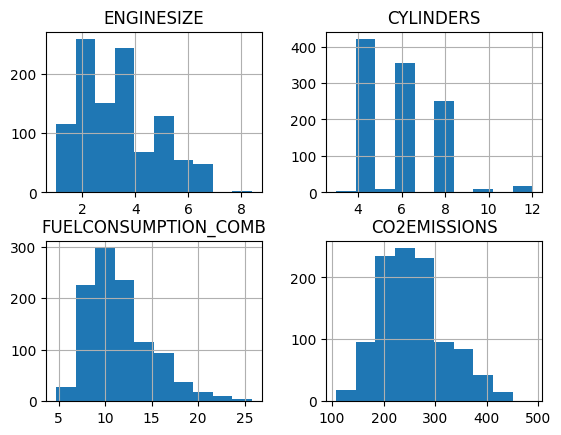

In [10]:
# lets plot those features to understand more [distribution graph]
viz = cdf
# histogram (distribution graphs)
viz.hist()
plt.show()

To understand the linear relationship between the features and target variable (co2 emission) lets plot some scatter plot.

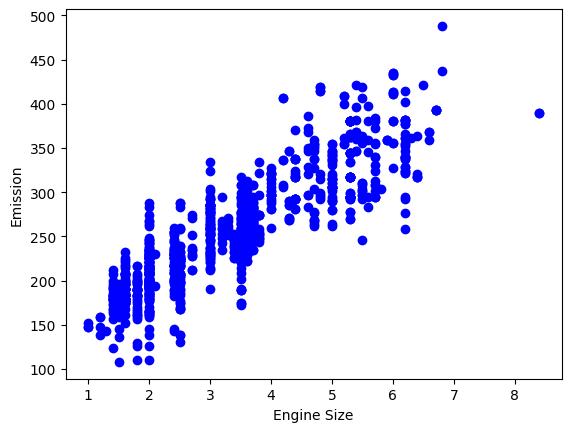

In [13]:
# linear relationship between engine size and emission
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

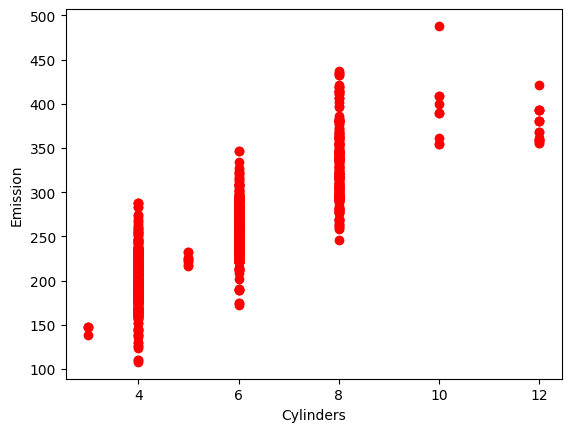

In [14]:
# linear relationship between cylinders and emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color= 'red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

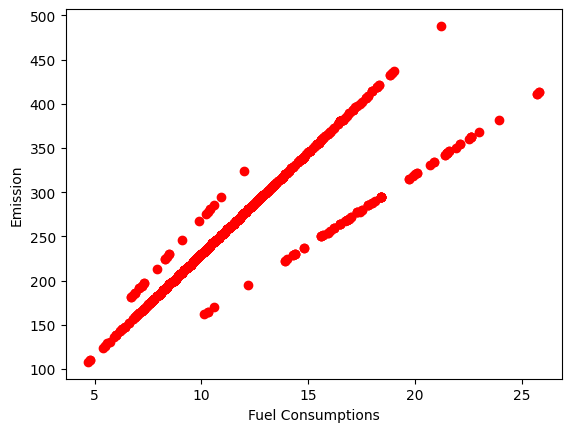

In [16]:
# linear relationship between fuel consumptions and emission
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color= 'red')
plt.xlabel("Fuel Consumptions")
plt.ylabel("Emission")
plt.show()

## Train Test Splitting

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [17]:
mask = np.random.rand(len(df)) < 0.8

In [18]:
train = cdf[mask]
test = cdf[~mask]

In [19]:
train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
3,3.5,6,11.1,255
5,3.5,6,10.0,230
6,3.5,6,10.1,232


In [21]:
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,1.5,4,5.9,136
4,3.5,6,10.6,244
11,3.5,6,10.4,239
13,5.9,12,15.6,359
14,4.7,8,14.7,338


## Simple Regression Model


Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the **'residual sum of squares'** between the actual value **y** in the dataset, and the predicted value **yhat** using linear approximation.

### Train Data Distribution

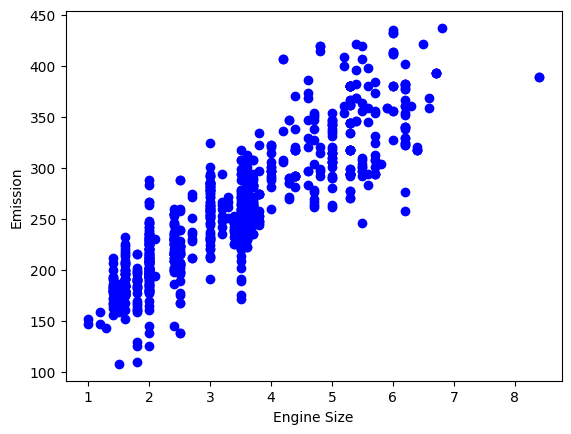

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

### Modeling
using scikit learn package to model data

As it is simple linear model, there will be only one independent value, which is Engine Size and the dependent value is Co2 Emission

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [24]:
# coefficients
print("Co-Efficients: ",regr.coef_)
print("Intercept:", regr.intercept_)

Co-Efficients:  [[38.41672734]]
Intercept: [128.37697133]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

### Plot Outputs
we can plot the fit line over the data

Text(0, 0.5, 'Emission')

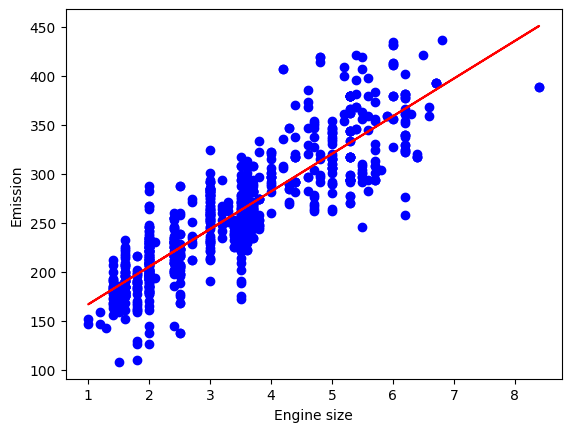

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

* **Mean Absolute Error:** It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* **Mean Squared Error (MSE):** It is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* **Root Mean Squared Error (RMSE)**.

* **R-squared** is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). **(1- Relative Squared Error (RSE))**

In [27]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of Squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean Absolute Error: 25.28
Residual sum of Squares (MSE): 1096.60
R2-score: 0.75


## Practice another

we did a simple linear regression using engine size, now lets do one using fuel consumption

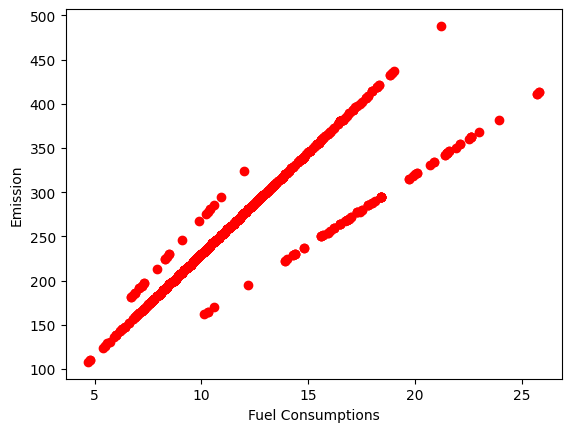

In [36]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("Fuel Consumptions")
plt.ylabel("Emission")
plt.show()

In [30]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [34]:
print("Co-efficients:", regr.coef_)
print("Intercept:", regr.intercept_)

Co-efficients: [[15.89788729]]
Intercept: [72.34355037]


Text(0, 0.5, 'Emission')

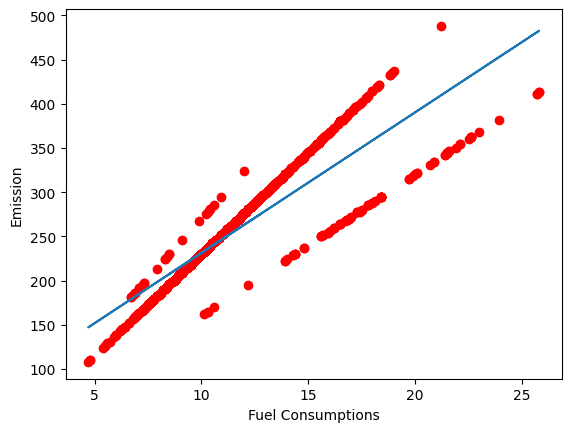

In [37]:
# plotting the model

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0])
plt.xlabel("Fuel Consumptions")
plt.ylabel("Emission")

In [38]:
## evaluation

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x)

In [41]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean Squared Error: %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2 Score: %.2f" % r2_score(test_y, test_y_))

Mean Absolute Error: 20.61
Mean Squared Error: 787.19
R2 Score: 0.82
